# Word Cloud with MeCab

## Janome

In [1]:
# Janomeのロード
from janome.tokenizer import Tokenizer # pip install janome
t = Tokenizer()
for token in t.tokenize(u'すもももももももものうち'):
    print(token)

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


## Word Cloud 基本

http://sujiko.hatenablog.com/entry/2019/09/14/224231
http://cedro3.com/ai/word-cloud/

In [2]:
from wordcloud import WordCloud # conda install -c conda-forge wordcloud
import matplotlib.pyplot as plt
from janome.tokenizer import Tokenizer # pip install janome
import re as re

In [3]:
def create_wordcloud_1(text):
    
    t = Tokenizer()
    tokens = t.tokenize(text)
    
    word_list=[]
    for token in tokens:
        word = token.surface
        partOfSpeech = token.part_of_speech.split(',')[0]
        partOfSpeech2 = token.part_of_speech.split(',')[1]

        if partOfSpeech == "名詞":
            if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
                word_list.append(word)
                
    words=" ".join(word_list)
    font_path = "./font/lightnovel.otf"

    stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
                 u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
                 u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
                 u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'']

    wordcloud = WordCloud(background_color="white", max_font_size=100, width=900, 
                          height=600, font_path=font_path, stopwords=set(stop_words)).generate(words)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("result/SR.png")
    plt.show()

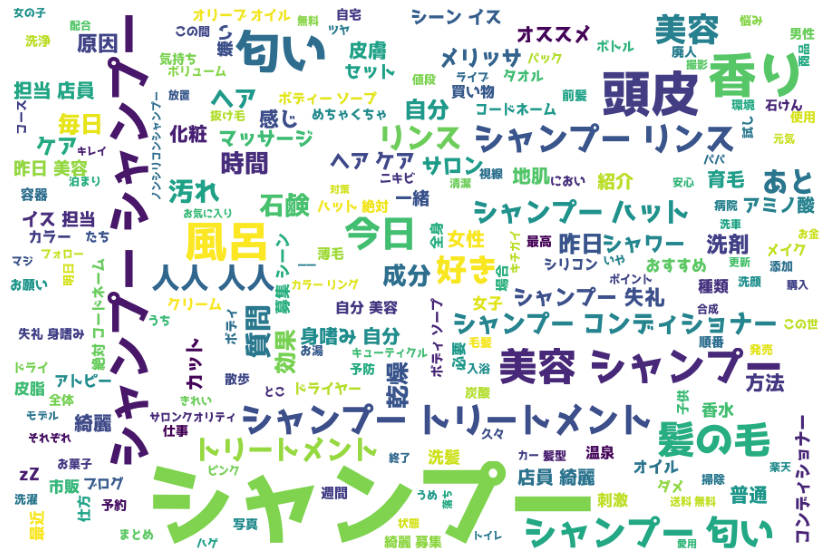

In [4]:
text = open("./text/190126_シャンプー_Tweet_CL.txt",mode="r",encoding="shift-jis").read()
create_wordcloud_1(text)

## StopWords

https://www.dskomei.com/entry/2019/04/04/191506

In [5]:
import urllib.request

# ストップワードをダウンロード
url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
urllib.request.urlretrieve(url, 'stop_word.txt')

('stop_word.txt', <http.client.HTTPMessage at 0x22e643f3108>)

In [6]:
with open('stop_word.txt', 'r', encoding='utf-8') as file:
    stopwords = [word.replace('\n', '') for word in file.readlines()]

stopwords

['あそこ',
 'あたり',
 'あちら',
 'あっち',
 'あと',
 'あな',
 'あなた',
 'あれ',
 'いくつ',
 'いつ',
 'いま',
 'いや',
 'いろいろ',
 'うち',
 'おおまか',
 'おまえ',
 'おれ',
 'がい',
 'かく',
 'かたち',
 'かやの',
 'から',
 'がら',
 'きた',
 'くせ',
 'ここ',
 'こっち',
 'こと',
 'ごと',
 'こちら',
 'ごっちゃ',
 'これ',
 'これら',
 'ごろ',
 'さまざま',
 'さらい',
 'さん',
 'しかた',
 'しよう',
 'すか',
 'ずつ',
 'すね',
 'すべて',
 'ぜんぶ',
 'そう',
 'そこ',
 'そちら',
 'そっち',
 'そで',
 'それ',
 'それぞれ',
 'それなり',
 'たくさん',
 'たち',
 'たび',
 'ため',
 'だめ',
 'ちゃ',
 'ちゃん',
 'てん',
 'とおり',
 'とき',
 'どこ',
 'どこか',
 'ところ',
 'どちら',
 'どっか',
 'どっち',
 'どれ',
 'なか',
 'なかば',
 'なに',
 'など',
 'なん',
 'はじめ',
 'はず',
 'はるか',
 'ひと',
 'ひとつ',
 'ふく',
 'ぶり',
 'べつ',
 'へん',
 'ぺん',
 'ほう',
 'ほか',
 'まさ',
 'まし',
 'まとも',
 'まま',
 'みたい',
 'みつ',
 'みなさん',
 'みんな',
 'もと',
 'もの',
 'もん',
 'やつ',
 'よう',
 'よそ',
 'わけ',
 'わたし',
 '',
 'ハイ',
 '',
 '',
 '上',
 '中',
 '下',
 '字',
 '',
 '',
 '年',
 '月',
 '日',
 '時',
 '分',
 '秒',
 '週',
 '火',
 '水',
 '木',
 '金',
 '土',
 '国',
 '都',
 '道',
 '府',
 '県',
 '市',
 '区',
 '町',
 '村',
 '',
 '',
 '各',
 '第',
 '方',
 '何',
 '的',
 '度',
 '文',
 '

In [7]:
def create_wordcloud_2(text):
    
    t = Tokenizer()
    tokens = t.tokenize(text)
    
    word_list=[]
    for token in tokens:
        word = token.surface
        partOfSpeech = token.part_of_speech.split(',')[0]
        partOfSpeech2 = token.part_of_speech.split(',')[1]

        if partOfSpeech == "名詞":
            if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
                word_list.append(word)
                
    words=" ".join(word_list)
    font_path = "./font/lightnovel.otf"
    
    with open('stop_word.txt', 'r', encoding='utf-8') as file:
        stopwords = [word.replace('\n', '') for word in file.readlines()]

    font_path = "./font/lightnovel.otf"

    wordcloud = WordCloud(background_color="white", max_font_size=100, width=900, 
                          height=600, font_path=font_path, stopwords=set(stopwords)).generate(words)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("result/SR.png")
    plt.show()

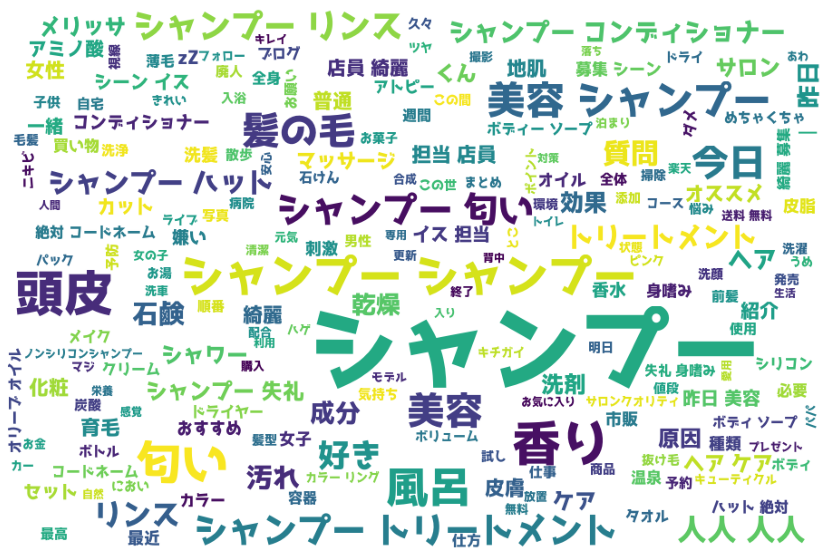

In [8]:
text = open("./text/190126_シャンプー_Tweet_CL.txt",mode="r",encoding="shift-jis").read()
create_wordcloud_2(text)

## Mask

https://sugiyamatatsuya.com/python%E3%81%A7wordcloud%E3%82%92%E4%BD%9C%E3%81%A3%E3%81%A6%E3%81%BF%E3%82%8B/

In [9]:
from PIL import Image
import numpy as np

In [10]:
def create_wordcloud_3(mask, text):
    
    t = Tokenizer()
    tokens = t.tokenize(text)
    
    word_list=[]
    for token in tokens:
        word = token.surface
        partOfSpeech = token.part_of_speech.split(',')[0]
        partOfSpeech2 = token.part_of_speech.split(',')[1]

        if partOfSpeech == "名詞":
            if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
                word_list.append(word)
                
    words=" ".join(word_list)
    font_path = "./font/lightnovel.otf"
    
    with open('stop_word.txt', 'r', encoding='utf-8') as file:
        stopwords = [word.replace('\n', '') for word in file.readlines()]

    font_path = "./font/lightnovel.otf"

    wordcloud = WordCloud(background_color="white", mask=mask, contour_width=3,
                          contour_color='steelblue',font_path=font_path, stopwords=set(stopwords)).generate(words)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("result/SR.png")
    plt.show()

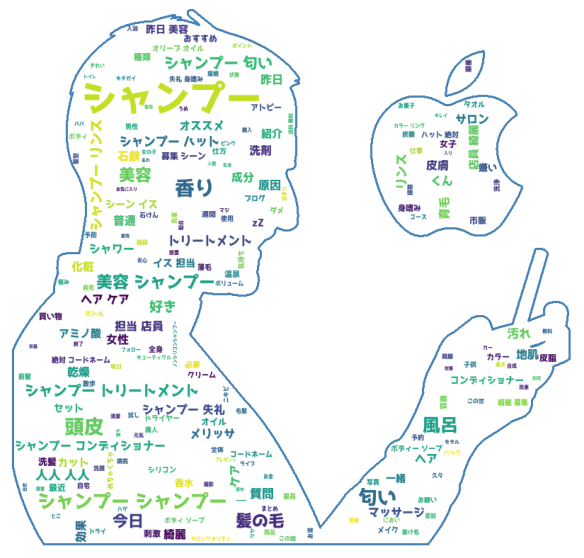

In [11]:
text = open("./text/190126_シャンプー_Tweet_CL.txt",mode="r",encoding="shift-jis").read()

mask = np.array(Image.open('./mask/jobs.png'))
create_wordcloud_3(mask, text)

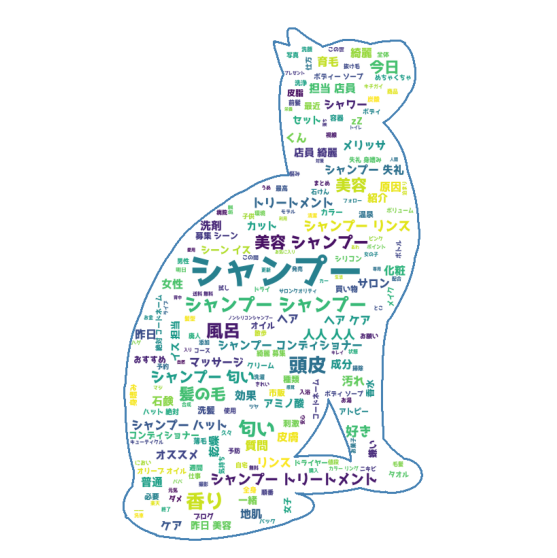

In [12]:
mask = np.array(Image.open('./mask/cat.png'))
create_wordcloud_3(mask, text)

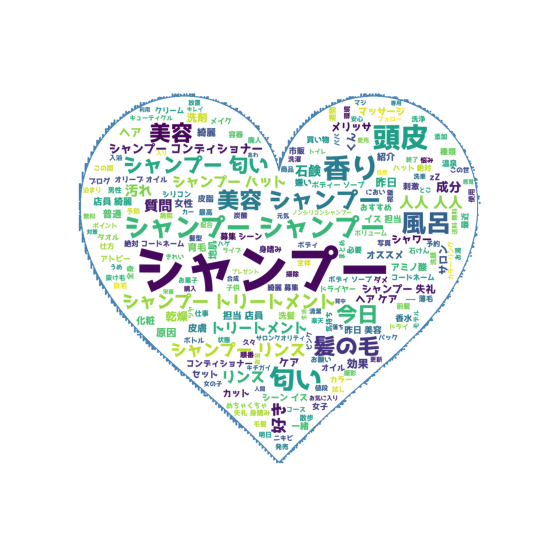

In [13]:
mask = np.array(Image.open('./mask/heart.jpg'))
create_wordcloud_3(mask, text)

## テキストデータスクレイピング

https://qiita.com/poorko/items/9140c75415d748633a10

In [14]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [15]:
html=requests.get("https://ja.wikipedia.org/wiki/%E9%AC%BC%E6%BB%85%E3%81%AE%E5%88%83").text
soup=BeautifulSoup(html,"html.parser")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="ja">
<head>
<meta charset="utf-8"/>
<title>鬼滅の刃 - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"ja","wgMonthNames":["","1月","2月","3月","4月","5月","6月","7月","8月","9月","10月","11月","12月"],"wgRequestId":"0c4147c7-a845-4752-b666-880a7169615f","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"鬼滅の刃","wgTitle":"鬼滅の刃","wgCurRevisionId":79841090,"wgRevisionId":79841090,"wgArticleId":3365460,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["編集拡張半保護中のページ","Infobox animanga/画像表示","公開前の映画","漫画作品 き","2016年の漫画","週刊少年ジャンプの漫画作品","ファンタジー漫画","鬼を題材にした作品","吸血鬼漫画","兄弟姉妹を題材とした漫画作品",
"大正時代を舞台とした漫画作品","アニメ作品 き","2019年のテレビアニメ","UHFアニメ","ユーフォーテーブルのアニメ作品","アニプレックスのアニメ作品

In [16]:
# scriptやstyleを含む要素を削除する
for script in soup(["script", "style"]):
    script.decompose()
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="ja">
<head>
<meta charset="utf-8"/>
<title>鬼滅の刃 - Wikipedia</title>


<link href="/w/load.php?lang=ja&amp;modules=ext.cite.styles%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cmediawiki.toc.styles%7Cskins.vector.styles.legacy%7Cwikibase.client.init&amp;only=styles&amp;skin=vector" rel="stylesheet"/>

<meta content="" name="ResourceLoaderDynamicStyles"/>
<link href="/w/load.php?lang=ja&amp;modules=site.styles&amp;only=styles&amp;skin=vector" rel="stylesheet"/>
<meta content="MediaWiki 1.36.0-wmf.10" name="generator"/>
<meta content="origin" name="referrer"/>
<meta content="origin-when-crossorigin" name="referrer"/>
<meta content="origin-when-cross-origin" name="referrer"/>
<meta content="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Kimetsu_no_Yaiba_logo.svg/1200px-Kimetsu_no_Yaiba_logo.svg.png" property="og:image"/>
<link href="//ja.m.wikipedia.org/wiki/%E9%AC%BC%E6

In [25]:
# テキストのみを取得=タグは全部取る
text=soup.get_text()
print(text)





鬼滅の刃 - Wikipedia





























鬼滅の刃

出典: フリー百科事典『ウィキペディア（Wikipedia）』



ナビゲーションに移動
検索に移動




鬼滅の刃


ジャンル

少年漫画、時代劇、剣劇ダーク・ファンタジー、伝奇ロマン


漫画


作者

吾峠呼世晴


出版社

集英社


掲載誌

週刊少年ジャンプ


レーベル

ジャンプ・コミックス


発表号

2016年11号 - 2020年24号


発表期間

2016年2月15日 - 2020年5月18日


巻数

既刊22巻（2020年10月現在）


話数

全205話


アニメ


原作

吾峠呼世晴


監督

外崎春雄


シリーズ構成

ufotable


脚本

ufotable


キャラクターデザイン

松島晃


音楽

梶浦由記、椎名豪


アニメーション制作

ufotable


製作

アニプレックス集英社、ufotable


放送局

TOKYO MXほか


放送期間

2019年4月 - 9月


話数

全26話[1]


映画：劇場版 鬼滅の刃 無限列車編


原作

吾峠呼世晴


監督

外崎春雄


脚本

ufotable


キャラクターデザイン

松島晃


音楽

梶浦由記、椎名豪


制作

ufotable


配給

東宝、アニプレックス


封切日

2020年10月16日予定


上映時間

未定


その他

PG12指定[2]


テンプレート - ノート


プロジェクト

漫画・アニメ


ポータル

漫画・アニメ

『鬼滅の刃』（きめつのやいば）は、吾峠呼世晴による日本の漫画。『週刊少年ジャンプ』（集英社）にて2016年11号から2020年24号まで連載された[3]。略称は「鬼滅」[4]。

目次

1 概要
2 あらすじ

2.1 竈門炭治郎立志編（1巻 - 6巻）
2.2 中盤（仮称。7巻 - 16巻）
2.3 最終章：無限城での決戦（16巻 - ）


3 登場人物

3.1 主要人物

3.1.1 同期剣士


3.2 鬼殺隊

3.2.1 当主家
3.2.2 柱
3.2.3 隊士


3.3 鬼殺隊関係者

3.3.1 育手
3.3.2 刀

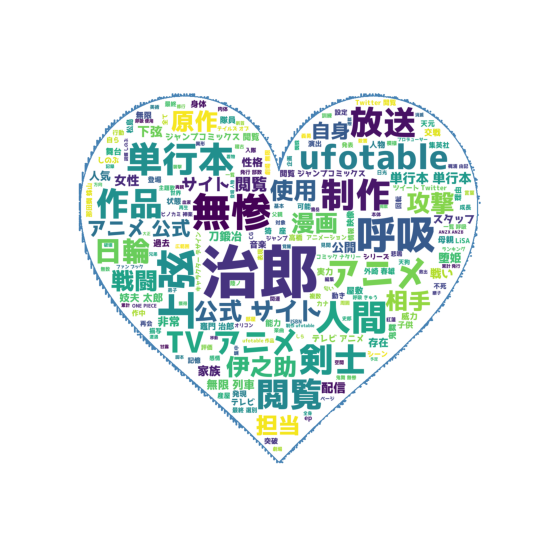

In [26]:
mask = np.array(Image.open('./mask/heart.jpg'))
create_wordcloud_3(mask, text)